###  Probability

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### Events and Sample Spaces

Let's assume we have a fair coin, which is equally likely to come up heads (H) or tails (T).

In instances like this, where the two outcomes are equally likely, we can use probability theory to express the likelihood of a particular **event** by comparing it with the **sample space** (the set of all possible outcomes; can be denoted as $\Omega$):

P(event)=# of outcomes of event / # of outcomes in Ω

If we're only flipping the coin once, then there are only two possible outcomes in the sample space $\Omega$: it will either be H or T (using set notation, we could write this as $\Omega$ = {H, T}).

Therefore: $$ P(H) = \frac{1}{2} = 0.5 $$

Equally: $$ P(T) = \frac{1}{2} = 0.5 $$

As a separate example, consider drawing a single card from a standard deck of 52 playing cards. In this case, the number of possible outcomes in the sample space $\Omega$ is 52.

There is only one ace of spades in the deck, so the probability of drawing it is: $$ P(\text{ace of spades}) = \frac{1}{52} \approx 0.019 $$

In contrast there are four aces, so the probability of drawing an ace is: $$ P(\text{ace}) = \frac{4}{52} \approx 0.077 $$

Some additional examples:
$$ P(\text{spade}) = \frac{13}{52} = 0.25 $$
$$ P(\text{ace OR spade}) = \frac{16}{52} \approx 0.307 $$
$$ P(\text{card}) = \frac{52}{52} = 1 $$
$$ P(\text{turnip}) = \frac{0}{52} = 0 $$

#### Multiple Independent Observations

Let's return to coin flipping to illustrate situations where we have an event consisting of multiple independent observations. For example, the probability of throwing two consecutive heads is: $$ P(\text{HH}) = \frac{1}{4} = 0.25 $$ ...because there is one HH event in the sample set of four possible events ($\Omega$ = {HH, HT, TH, TT}).

Likewise, the probability of throwing *three* consecutive heads is: $$ P(\text{HHH}) = \frac{1}{8} = 0.125 $$ ...because there is one HHH event in the sample set of eight possible events ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}).

In order to combine probabilities, we can multiply them. So the probability of throwing five consecutive heads, for example, is the product of probabilities we've already calculated: $$ P(\text{HHHHH}) = P(\text{HH}) \times P(\text{HHH}) = \frac{1}{4} \times \frac{1}{8} = \frac{1}{32} \approx 0.031 $$

In [2]:
import math

def calculate_probabilities(n):
    total_outcomes = 2 ** n
    for k in range(n + 1):
        num_ways = math.comb(n, k)
        probability = num_ways / total_outcomes
        print(f"P(k = {k}) = {num_ways}/{total_outcomes} ≈ {probability:.5f}")

calculate_probabilities(5)

P(k = 0) = 1/32 ≈ 0.03125
P(k = 1) = 5/32 ≈ 0.15625
P(k = 2) = 10/32 ≈ 0.31250
P(k = 3) = 10/32 ≈ 0.31250
P(k = 4) = 5/32 ≈ 0.15625
P(k = 5) = 1/32 ≈ 0.03125


#### Combinatorics

*Combinatorics* is a field of mathematics devoted to counting that can be helpful to studying probabilities. We can use **factorials** (e.g., $4! = 4 \times 3 \times 2 \times 1 = 24$), which feature prominently in combinatorics, to calculate probabilities instead of painstakingly determining all of the members of the sample space $\Omega$ and counting subsets within $\Omega$.

More specifically, we can calculate the number of outcomes of an event using the "number of combinations" equation: $$ {n \choose k} = \frac{n!}{k!(n - k)!} $$

The left-hand side of the equation is read "$n$ choose $k$" and is most quickly understood via an example: If we have three coin flips, $n = 3$, and if we're interested in the number of ways to get two head flips (or two tail flips, for that matter), $k = 2$. We would read this as "3 choose 2" and calculate it as:
$$ {n \choose k} = {3 \choose 2} = \frac{3!}{2!(3 - 2)!} = \frac{3!}{(2!)(1!)} = \frac{3 \times 2 \times 1}{(2 \times 1)(1)} = \frac{6}{(2)(1)} = \frac{6}{2} = 3 $$

This provide us with the numerator for event-probability equation from above:Ω

P(event)=# of outcomes of event / # of outcomes in Ω

In [3]:
# of outcomes of event/ # of outcomes in Ω= 3/2^n = 3/2^3 = 3/8 = 0.375


### The Law of Large Numbers

In [4]:
import numpy as np

In [5]:
ns = np.array([2,4,8,16,32,64,128,256,512,1024,2048,4096])

In [6]:
np.random.seed(42)

The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability.

In [7]:
np.random.binomial(1, 0.5)

0

In [8]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [9]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

In [10]:
#import numpy as np

#print(np.random.rand(3))
# Output: [0.234, 0.847, 0.123] (random numbers, different every time)

In [11]:
#import numpy as np

#np.random.seed(42)
#print(np.random.rand(3))
# Output: [0.374, 0.950, 0.731] (same numbers every time)

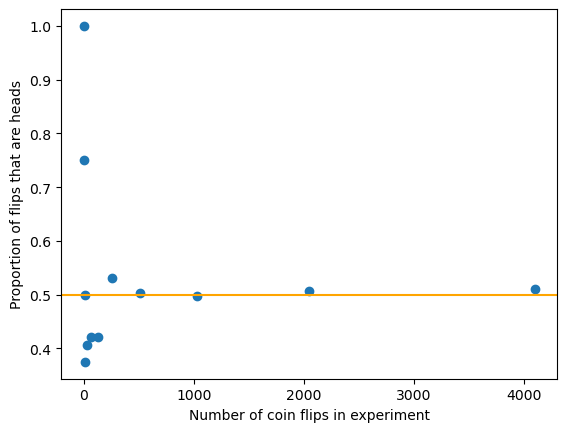

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

#### Statistics

The field of statistics applies probability theory to make inferences with a quantifiable degree of confidence. For example, let's say we ran the five-coin-flip experiment 1000 times with a fair coin:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

We can plot the results of our experiment to create a **probability distribution**:

In [15]:
heads, event_count = np.unique(heads_count, return_counts=True)

In [16]:
heads

array([0, 1, 2, 3, 4, 5])

In [17]:
event_count

array([ 33, 181, 285, 313, 160,  28], dtype=int64)

In [18]:
event_proba = event_count/n_experiments
event_proba

array([0.033, 0.181, 0.285, 0.313, 0.16 , 0.028])

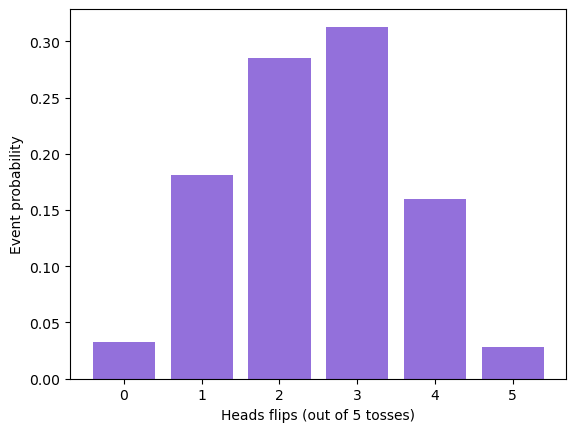

In [19]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

In [20]:
from math import factorial

In [21]:
def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

In [22]:
coinflip_prob(5, 3)

0.3125

In [23]:
[coinflip_prob(5, h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

### Mean

The most common measure of central tendency of all (so much so that it's synonomous with the lay usage of the term "average"), is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

Expected value is in fact the long-term *mean* of some function (i.e., $\mu = \mathbb{E}$). Let's calculate how close the sample mean, $\bar{x}$, of our five-coin-flip experiments comes to the expected value, $\mathbb{E} = 2.5$.

In [24]:
len(heads_count)

1000

In [25]:
heads_count[0:20]

array([2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2])

In [26]:
sum(heads_count)/len(heads_count)

2.47

In [27]:
heads_count.mean() # fun!

2.47

### Median

The second most common measure of central tendency is the median, the midpoint value in the distribution:

In [28]:
heads_count.sort()

In [29]:
heads_count[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [31]:
len(heads_count)

1000

With an odd number of values in a distribution, we consider the single midpoint to be the median, e.g., the midpoint of the sorted array `[2, 4, 6, 9, 10]` is six.

With an even number, we take the mean of the two values that straddle the midpoint:

In [32]:
heads_count[499]

3

In [33]:
heads_count[500]

3

In [34]:
(3+3)/2

3.0

Built-in method:

In [35]:
np.median(heads_count)

3.0

#### Mode

The **mode** is the final common measure of central tendency. It is simply the value in the distribution that occurs most frequently.

As is clear in the most recently output chart, in the case of our five-coin-toss experiment, the mode is three.

Method available in the SciPy `stats` module:

In [36]:
#heads_count

In [37]:
st.mode(heads_count)

ModeResult(mode=3, count=313)

In [38]:
st.mode(heads_count)[0]

3

With small sample sizes, the mean typically provides the most accurate measure of central tendency.

With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed:

In [39]:
x = st.skewnorm.rvs(0, size=1000) # first argument is "skewness"; 0 has no skew

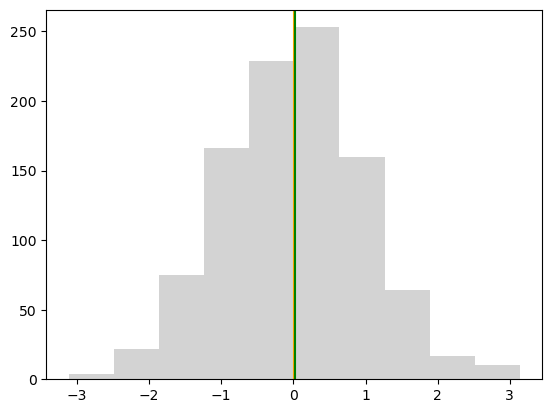

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')
# Note: Mode only applies to PMFs; this is a PDF

Skewed distributions, in contrast, drag the mean away from the center and toward the tail:

In [41]:
x = st.skewnorm.rvs(10, size=1000)
#x

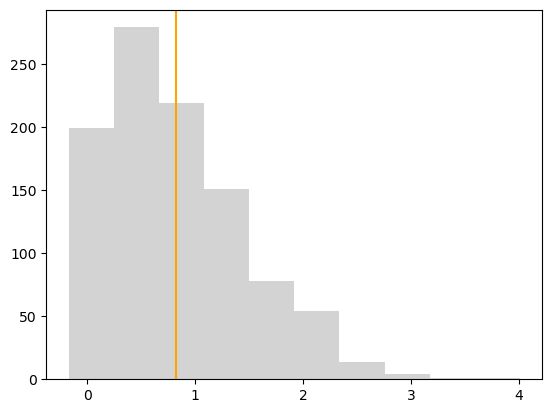

In [42]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

The mode is least impacted by skew, but is only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

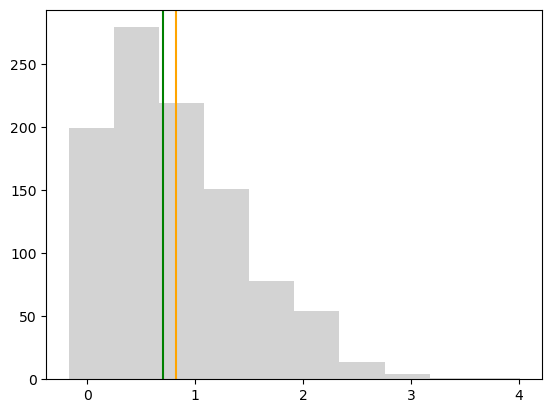

In [43]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Quantiles

The median, which divides a distribution in two at its midpoint, is the most well-known example of a quantile:

In [44]:
import numpy as np

In [45]:
np.median(x)

0.6987365121323832

In [46]:
np.quantile(x, 0.5)

0.6987365121323832

Generally speaking, quantiles divide up distributions and the most common are:

* Percentiles,
* Quartiles, and
* Deciles.

**Percentiles** divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

In [47]:
p = np.percentile(x, [95, 99])
p

array([2.06249928, 2.51830108])

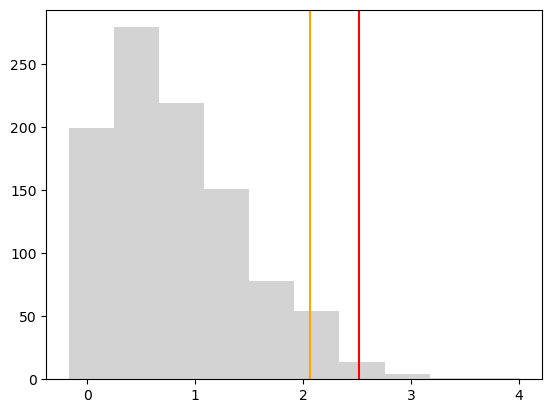

In [48]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

Note that the Numpy `quantile()` method is identical to the `percentile()` method except we pass proportions (ranging from zero to one) into the former and percentages (ranging from zero to 100) into the latter:

In [49]:
np.quantile(x, [.95, .99]) 

array([2.06249928, 2.51830108])

**Quartiles**, as their name suggests, are quantiles that divide a distribution into quarters by splitting the distribution at the 25th percentile, the median (a.k.a. the 50th percentile), and the 75th percentile:

In [50]:
q = np.percentile(x, [25, 50, 75])
q

array([0.32494046, 0.69873651, 1.19431522])

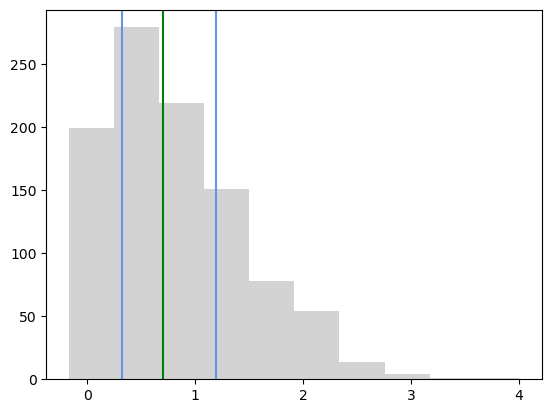

In [51]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')

_ = plt.hist(x, color = 'lightgray')

Finally, **deciles** (from Latin *decimus*, meaning "tenth") divide a distribution into ten evenly-sized segments:

In [52]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [53]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

As examples, we can refer to the bottom 10% as the bottom decile or the first decile, while the top 10% is the top decile or tenth decile.

### Box and Whisker Plot

In [54]:
sns.set(style='whitegrid')

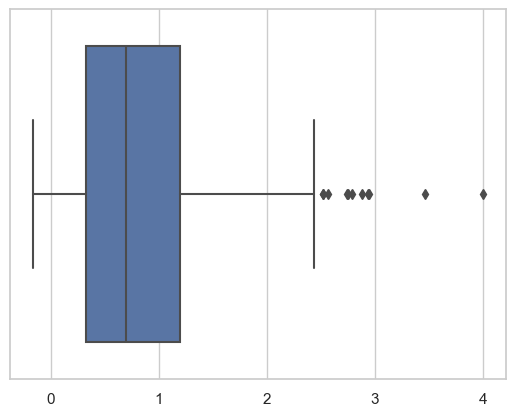

In [55]:
_=sns.boxplot(x=x)

Box edges and median are determined by quartiles:

In [56]:
q

array([0.32494046, 0.69873651, 1.19431522])

Box edges define the inter-quartile range (IQR):

In [57]:
r = 1.194 - 0.325
r

0.869

Whisker lengths are determined by furthest data points within $1.5 \times \text{IQR}$ of the box edges.

In this case, the lower whisker could stretch as far down (to the left in the plot) as:

In [58]:
0.325 - 1.5*r

-0.9785000000000001

The lowest value is inside of that so the whisker is plotted where that lowest value is:

In [59]:
np.min(x)

-0.17083838831568182

The upper whisker could stretch as far up (to the right in the plot) as:

In [60]:
1.194 + 1.5*r

2.4975

There are several (eleven) values beyond this threshold in the distribution. These values are considered **outliers** and are plotted as individual points:

In [61]:
x.sort()

In [62]:
x[-15:]

array([2.39810074, 2.40295599, 2.41430044, 2.43541111, 2.51827951,
       2.52043572, 2.56177972, 2.74024547, 2.74882884, 2.78877435,
       2.88399304, 2.93368541, 2.94293176, 3.46465001, 4.00641863])

The twelth-highest value, 2.435, is the largest within the upper whisker's maximum reach and so the upper whisker is plotted there.

Useful for examining distributions on their own, box-and-whisker plots are especially helpful for comparing distributions:

In [63]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


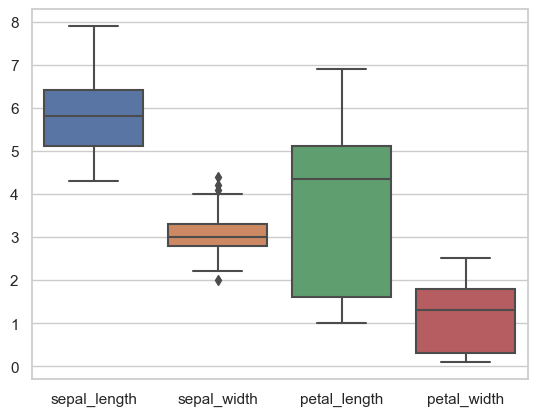

In [64]:
_ = sns.boxplot(data=iris)

In [65]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [66]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

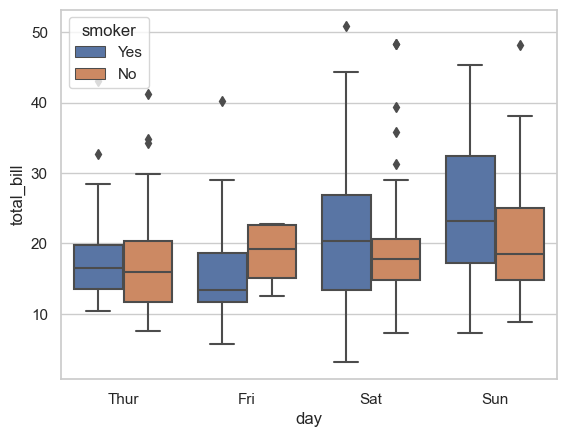

In [67]:
_ = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)

### Measures of Dispersion

IQR is a relatively rare measure of the dispersion of values around the center of a distribution. The most widely-used are:

* Variance,
* Standard deviation, and
* Standard eror.

**Variance** (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it:
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

this formula is the same as mean-squared-error cost, except $x_i$ is being compared to the mean $\mu$ instead of a predicted value $\hat{x}_i$.)

(Technically speaking, we should divide by  n -1 with a sample of data, but with the large datasets typical of machine learning, it's a negligible difference. If  n  were equal to a small number like 8 then it would matter.)

(Also technically speaking, the variance of a sample is typically denoted with $s^2$ as opposed to the Greek $\sigma^2$, akin to how $\bar{x}$ denotes the mean of a sample while the Greek $\mu$ is reserved for population mean.)

As an example let's calculate the variance of the PDF `x` from earlier:

In [68]:
xbar = np.mean(x)
xbar

0.8219573880882259

In [69]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [70]:
squared_differences[0:10]

[0.9856434536454379,
 0.9170226052916489,
 0.8965181282231266,
 0.8883307031718269,
 0.8733501430824243,
 0.8562478309191935,
 0.8319771034452769,
 0.8310929040089835,
 0.7863402041234238,
 0.7766155393407362]

In [71]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.39813585982250543

In [72]:
np.var(x)

0.3981358598225057

### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [73]:
sigma = (sigma_squared ** (1/2))
sigma

0.6309800787841923

In [74]:
np.std(x)

0.6309800787841925

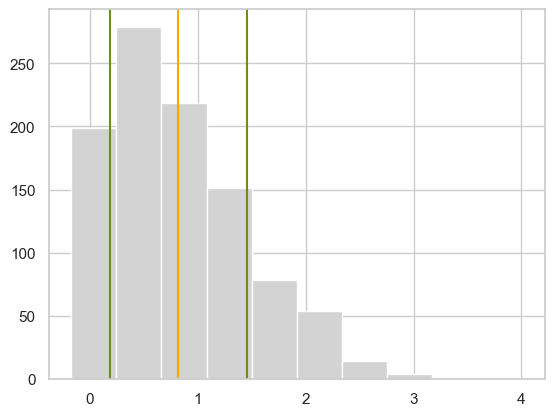

In [75]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray') 

### Standard Error:

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [76]:
sigma/(len(x))**(1/2)

0.019953342071505353

In [77]:
st.sem(x) # defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets of ML

0.01996332623128527

In [78]:
st.sem(x, ddof=0) # 0 degrees of freedom (n)

0.01995334207150536

### Measures of Relatedness

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [79]:
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [80]:
x = iris.sepal_length
y = iris.petal_length

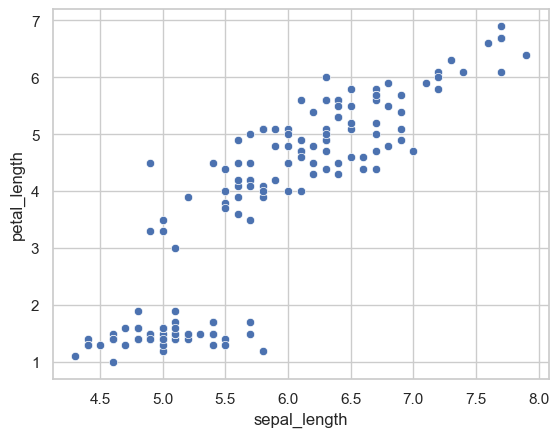

In [81]:
_ = sns.scatterplot(x=x, y=y)

In [82]:
n = len(x)

In [83]:
xbar = sum(x)/n
ybar = sum(y)/n

In [84]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [85]:
cov = sum(product)/n
cov

1.2658199999999995

The NumPy `cov()` method returns a **covariance matrix**, which is a $2 \times 2$ matrix because $x$ and $y$ together describe a two-dimensional space:

In [86]:
np.cov(x, y, ddof=0) # again, defaults to ddof=1

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

In [87]:
np.var(x)

0.6811222222222222

In [88]:
np.var(y)

3.0955026666666674

If $x$ and $y$ are inversely related, their covariance is negative. The less related they are, the closer their covariance is to zero:

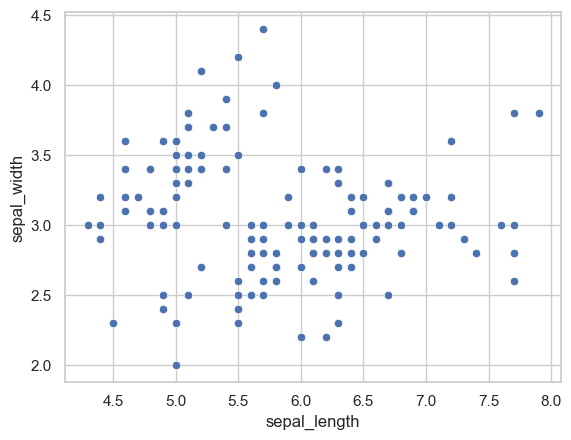

In [89]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [90]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [91]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

In [92]:
sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

In [93]:
cov / (sigma_x * sigma_y)

-0.11756978087951572

In [94]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300204, pvalue=0.15189826071144746)

The second value output of `pearsonr` is a measure of statistical significance

$\rho$ has a range of -1 to 1, with values closer to zero indicating less correlation:

In [95]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

-0.11756978413300204

The closer $\rho$ is to 1 or -1, the stronger the positive or negative correlation, respectively:

In [96]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865832

N.B.: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.

##  Distributions in Machine Learning

In [97]:
u = np.random.uniform(size=10000)

In [98]:
sns.set_style('ticks')

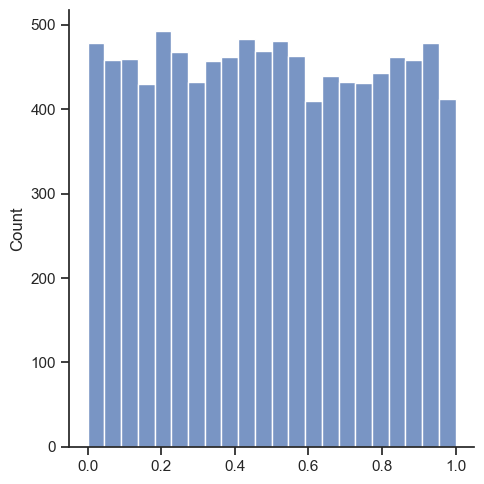

In [99]:
_ = sns.displot(u)

Real-world examples include:

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand
* Analog-to-digital signal quantization errors

### Gaussian

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**:

In [100]:
x = np.random.normal(size=10000)

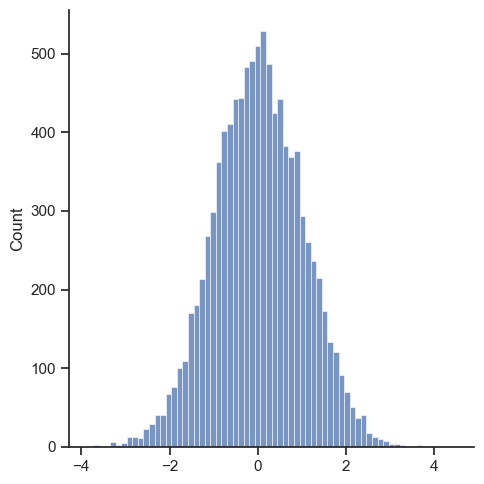

In [101]:
_ = sns.displot(x)

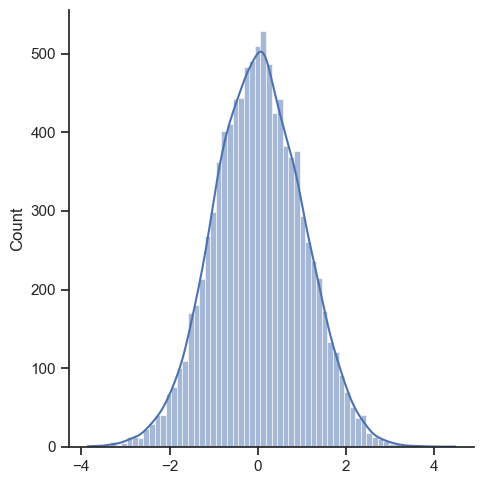

In [102]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [103]:
np.mean(x)

0.010746657894433886

In [104]:
np.std(x)

1.006376502514602

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$.

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Real-world examples include:

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [105]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 0.74300969,  0.24176689, -1.40842338,  0.22012919, -2.01823411,
       -0.38856925, -1.90557335, -1.06636308, -0.18173424, -0.81852481])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [106]:
np.mean(x_sample)

-0.6582516449828345

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [107]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

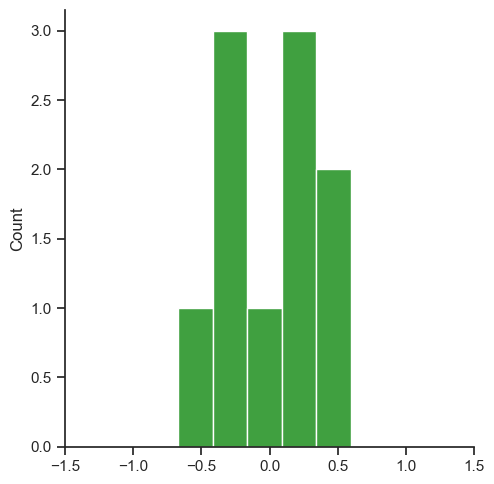

In [108]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:

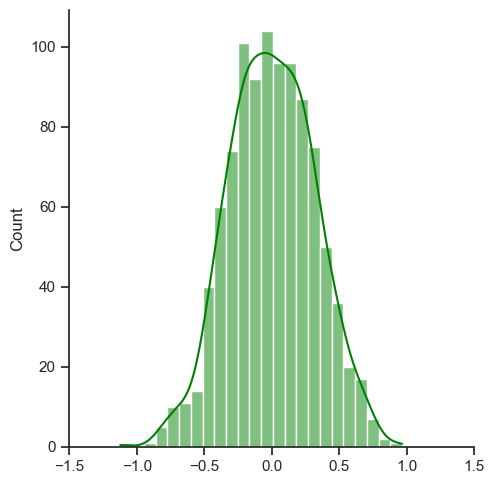

In [109]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

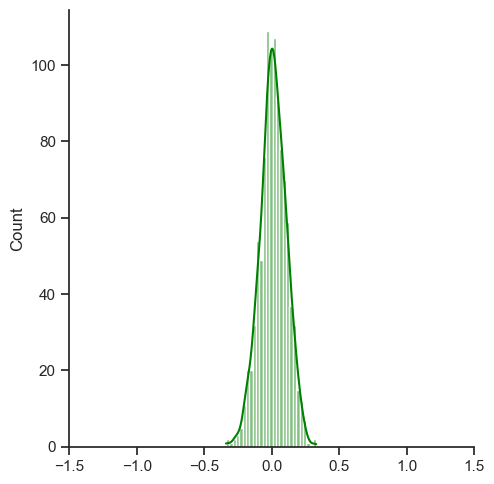

In [110]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

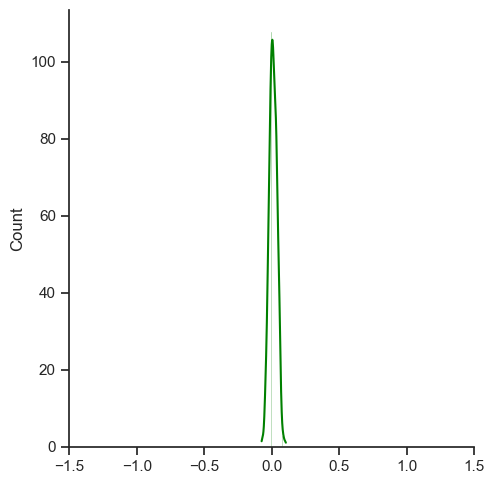

In [111]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [112]:
s = st.skewnorm.rvs(10, size=10000)

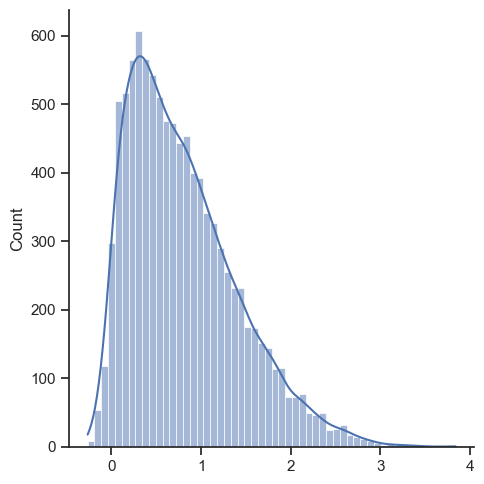

In [113]:
_ = sns.displot(s, kde=True)

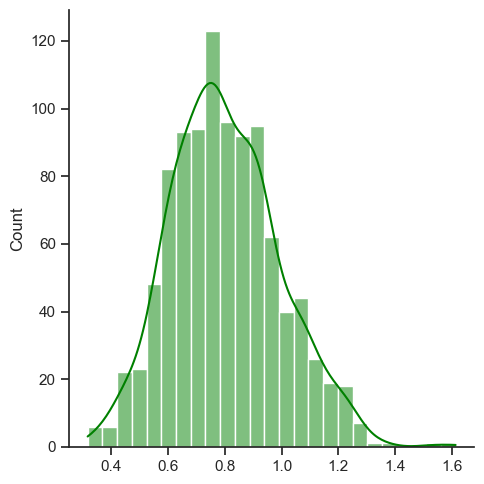

In [114]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

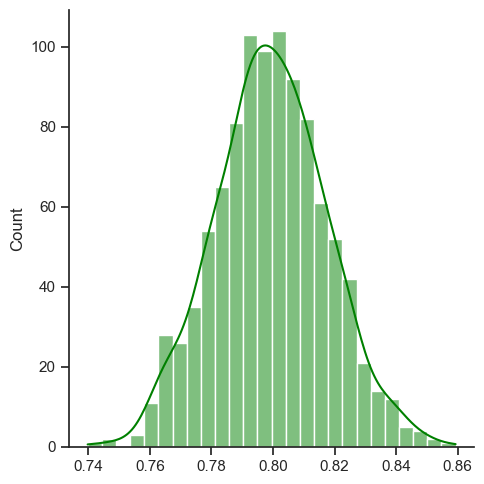

In [115]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [116]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

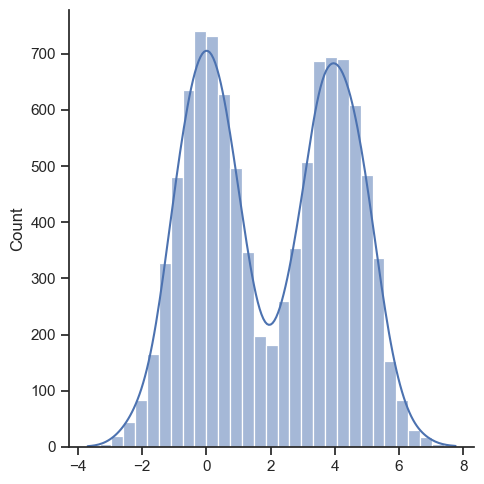

In [117]:
_ = sns.displot(m, kde=True)

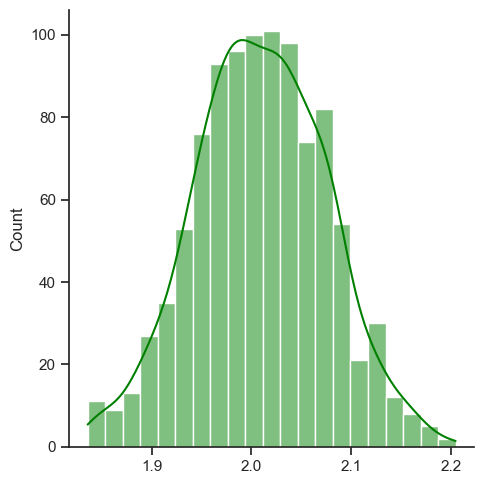

In [118]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

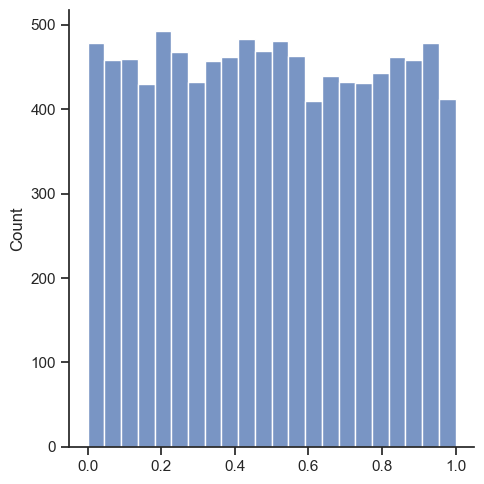

In [119]:
_ = sns.displot(u)

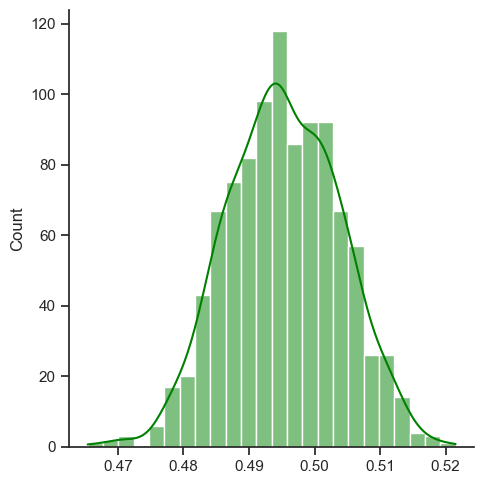

In [120]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

### Log-Normal Distribution

The natural logarithm of the **log-normal** distribution is normally distributed:

In [121]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1

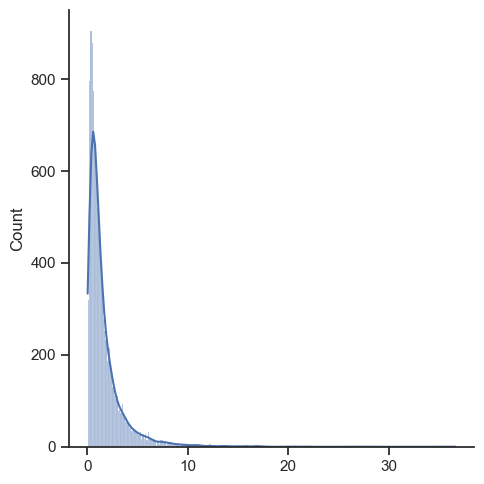

In [122]:
_ = sns.displot(x, kde=True)

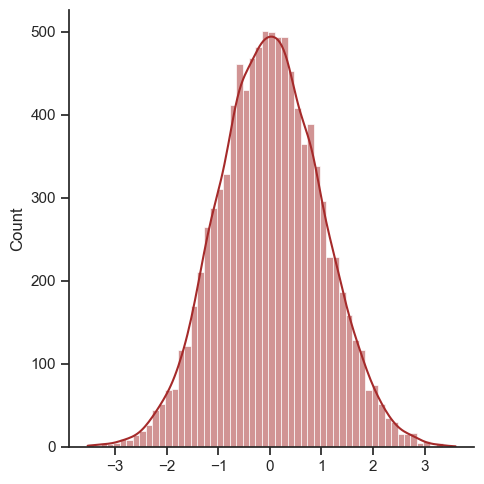

In [123]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples:

* Income
* Length of comments in online forums
* Duration of chess games or Rubik's Cube solves
* Size of publicly-available video files
* Number of hospitalized cases in an epidemic where public interventions are involved

### Exponential Distribution

Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

In [124]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

In [125]:
x

array([ 2.89716826,  0.31566866,  1.09838035, ...,  0.11655973,
       15.14699489,  2.90313724])

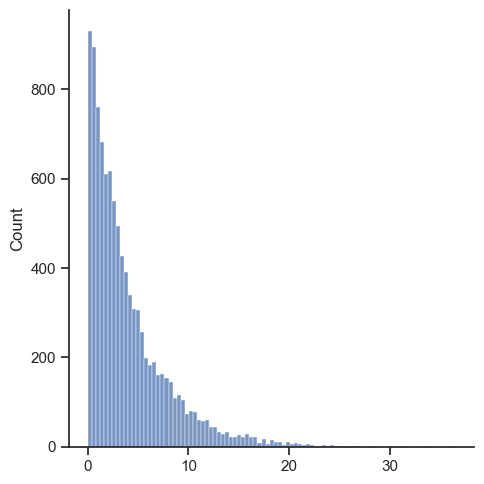

In [126]:
_ = sns.displot(x)

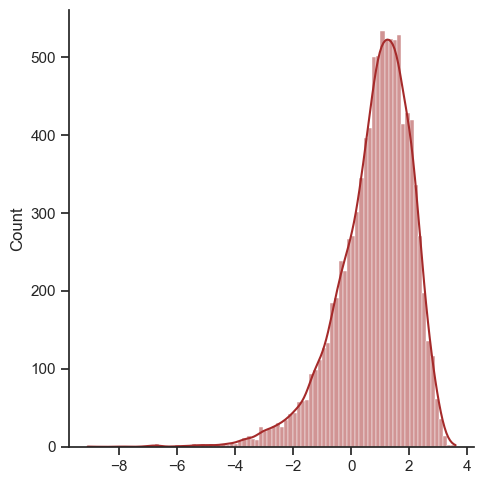

In [127]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples:

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

### Laplace Distribution

Named after Pierre-Simon Laplace, key figure in the development of Bayesian statistics.

In [128]:
x = np.random.laplace(size=10000)

Alternatively referred to as the "double exponential distribution":

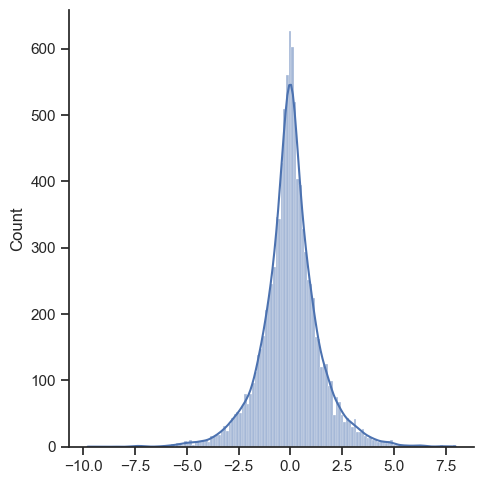

In [129]:
_ = sns.displot(x, kde=True)

In addition to the scale parameter of the exponential function, it has a location parameter that allows it to be centered on any value:

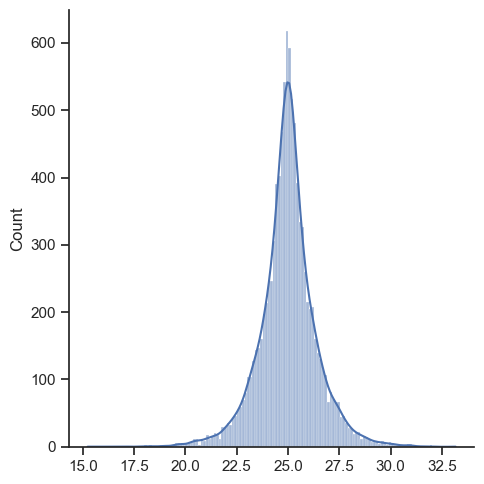

In [130]:
_ = sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

Real-world examples:

* Extreme weather events, e.g., maximum rainfall in a day
* Many machine learning applications; wherever an acute peak of probability is desired

### Binomial Distribution

All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF).

We've already been using it for coin flips; it's used for binary (0 or 1) outcome.

Its parameters are:

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [131]:
n = 5
n_experiments = 1000

#### Fair coin (p = 0.5)

In [132]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

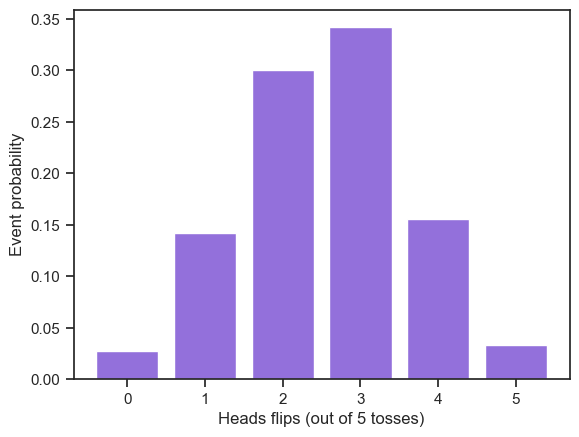

In [133]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

#### Weighted coin (p = 0.8)

In [134]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

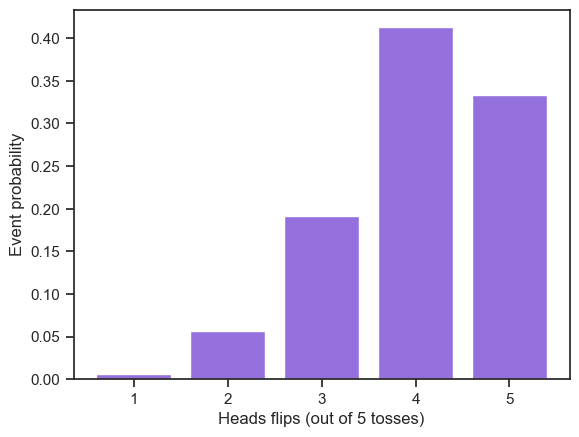

In [135]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Technically, binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$:

In [136]:
np.random.binomial(1, 0.5)

1

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

### Multinomial Distribution

Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die:

In [137]:
n = 1000

In [138]:
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([172, 158, 161, 159, 171, 179])

In [139]:
event_proba = rolls/n

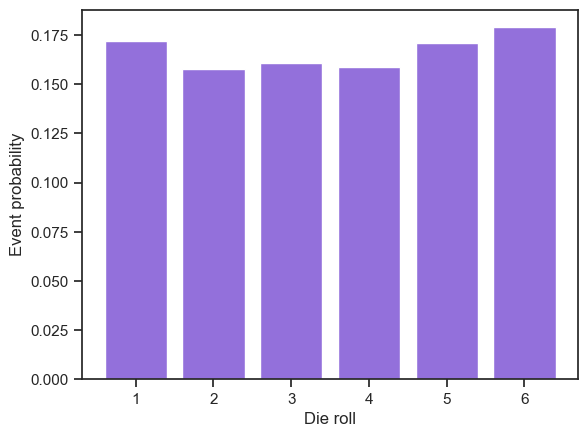

In [140]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

As in the binomial case, multinomial distributions are created by sampling $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$:

In [141]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 1, 0, 0, 0])

Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; NFL teams), not just integer values, we can't always calculate an expected value.

### Poisson Distribution

It's named after French mathematician Simeon Denis Poisson and is used for count data, e.g.:

* Number of cars that drive by in a minute
* Number of guests at restaurant in an evening
* Number of new hires in a month

First argument to NumPy `poisson()` method is $\lambda$, which must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5.

In [142]:
lam=5

Second argument is number of samples to draw:

In [143]:
n=1000

In [144]:
samples = np.random.poisson(lam, n)

In [145]:
#samples

In [146]:
#import matplotlib.pyplot as plt

#samples = np.random.poisson(lam,n)
#plt.hist(samples, bins=15, edgecolor='black')
#plt.title('Poisson Distribution with λ=5')
#plt.xlabel('Number of Events')
#plt.ylabel('Frequency')
#plt.show()

In [147]:
samples[0:20]

array([ 2,  2,  6,  3,  5,  5, 11,  2,  6,  7,  3, 11,  4,  4,  5,  7,  7,
        0,  3,  1])

In [148]:
x, x_count = np.unique(samples, return_counts=True)

In [149]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [150]:
x_count

array([  8,  27,  91, 152, 178, 166, 154,  88,  59,  32,  32,  10,   2,
         1], dtype=int64)

In [151]:
Px = x_count/n

In [152]:
Px

array([0.008, 0.027, 0.091, 0.152, 0.178, 0.166, 0.154, 0.088, 0.059,
       0.032, 0.032, 0.01 , 0.002, 0.001])

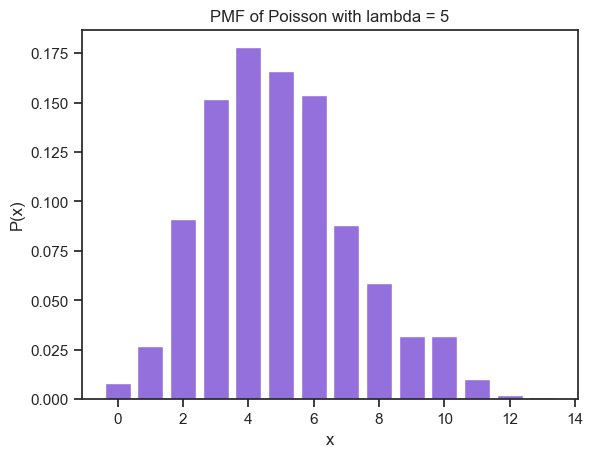

In [153]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

### Mixture Distributions

Multinomial distribution (driven by `np.random.choice()`) with probabilities set by `coefficients` array determines which of the three distributions to sample from.

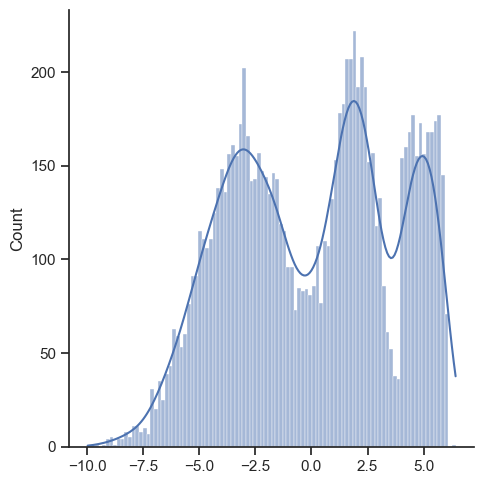

In [154]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

**Gaussian mixture model** (GMM) is common type of mixture distribution, wherein all of the component distributions are normal.

### Information Theory

**self-information** formula is:
$$ I(x)=-\text{log}P(x) $$

In [155]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
def self_info(my_p):
    return -1*np.log(my_p)

In [157]:
self_info(1)

-0.0

In [158]:
self_info(0.1)

2.3025850929940455

In [159]:
self_info(0.01)

4.605170185988091

In [160]:
self_info(0.5) + self_info(0.5)

1.3862943611198906

Depending on what logarithm base we use, the units of self-information vary. Most frequently, the units are either:

* **nats**:
    * Natural logarithm, as above with `np.log()`
    * Typical in ML
* **bits**:
    * Base-2 logarithm
    * A.k.a. **shannons**
    * Typical in computer science

So, the self-information of $P(x) = 0.1$ is ~2.3 nats.

### Shannon and Differential Entropy

To quantify uncertainty about a probability distribution (as opposed to a single event), we can use **Shannon entropy**, which is denoted $H(x)$ or $H(P)$:
$$ H(x) = \mathbb{E}_{\text{x}\sim P}[I(x)] \\
= -\mathbb{E}_{\text{x}\sim P}[\text{log}P(x)] $$

Conveys the expected informational content associated with an event drawn from the distribution:
* **Low entropy**:
    * Distribution is ~deterministic and outcomes are ~certain
    * E.g., weighted coin always lands heads up ($P(1)=1$)
* **High entropy**:
    * Outcomes are uncertain
    * Uniform distribution can be highest entropy
    * E.g., coin is as likely to be heads as tails ($P(0)=P(1)=0.5$)

In [161]:
def binary_entropy(my_p):
    return (my_p-1)*np.log(1-my_p) - my_p*np.log(my_p)

Will throw `nan` with $p=0$ (always tails) or $p=1$ (always heads), but we can get close:

In [162]:
binary_entropy(0.00001)

0.00012512920464949012

In [163]:
binary_entropy(0.99999)

0.00012512920464901166

In [164]:
binary_entropy(0.9)

0.3250829733914482

In [165]:
binary_entropy(0.5)

0.6931471805599453

In [166]:
p = np.linspace(0.001, 0.999, 1000) # start, finish, n points

In [167]:
H = binary_entropy(p)

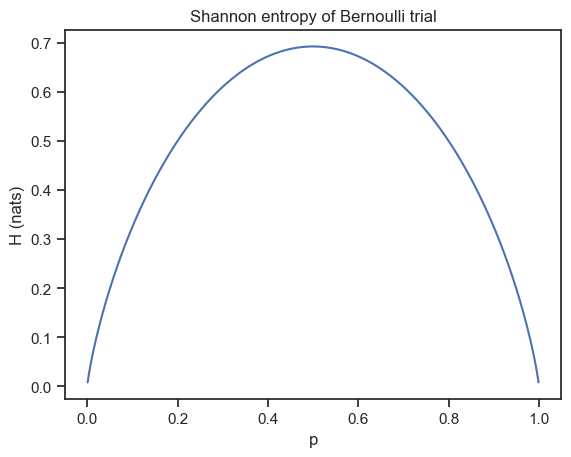

In [168]:
fig, ax = plt.subplots()
plt.title('Shannon entropy of Bernoulli trial')
plt.xlabel('p')
plt.ylabel('H (nats)')
_ = ax.plot(p,H)

**Differential entropy**: simply the term for Shannon entropy if distribution is PDF

### Kullback-Leibler Divergence

**KL divergence** enables us to quantify the relative Shannon (or differential) entropy of two probability distributions that are over the same random variable x.

For example, if we have one probability distribution described by $P(x)$ and another by $Q(x)$, their KL divergence (denoted $D_\text{KL}$) is:
$$ D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x)] $$

### Cross-Entropy

Cross-entropy is a concept derived from KL divergence.  it provides us with the **cross-entropy cost** function.

This cost function is ubiquitous in neural networks as it's the cost function of choice for predicting discrete, categorical outcomes. E.g., for a binary classifier, the cross-entropy cost ($C$) is:

$$ C = -(y \cdot \text{log}(\hat{y}) + (1-y) \cdot \text{log}(1-\hat{y})) $$

In [169]:
def cross_entropy(y, a):
    return -1*(y*np.log(a) + (1-y)*np.log(1-a))
cross_entropy(1, 0.9997)

0.00030004500900199243

In [170]:
cross_entropy(1, 0.9997)

0.00030004500900199243

In [171]:
cross_entropy(1, 0.9)

0.10536051565782628

In [172]:
cross_entropy(1, 0.6)

0.5108256237659907

In [173]:
cross_entropy(1, 0.3)

1.2039728043259361